# Assignment 1:  Sentiment with Deep Neural Networks

Welcome to the first assignment of course 3. **This is a practice assignment**, which means that the grade you receive won't count towards your final grade of the course. **However you can still submit your solutions and receive a grade along with feedback from the grader.** Before getting started take some time to read the following tips: 

#### TIPS FOR SUCCESSFUL GRADING OF YOUR ASSIGNMENT:

- All cells are frozen except for the ones where you need to submit your solutions.

- You can add new cells to experiment but these will be omitted by the grader, so don't rely on newly created cells to host your solution code, use the provided places for this.

- You can add the comment # grade-up-to-here in any graded cell to signal the grader that it must only evaluate up to that point. This is helpful if you want to check if you are on the right track even if you are not done with the whole assignment. Be sure to remember to delete the comment afterwards!

- To submit your notebook, save it and then click on the blue submit button at the beginning of the page.


In this assignment, you will explore sentiment analysis using deep neural networks. 

## Table of Contents
- [1 - Import the Libraries](#1)
- [2 - Importing the Data](#2)
    - [2.1 - Load and split the Data](#2-1)
    - [2.2 - Build the Vocabulary](#2-2)
        - [Exercise 1 - build_vocabulary](#ex-1)
    - [2.3 - Convert a Tweet to a Tensor](#2-3)
        - [Exercise 2 - max_len](#ex-2)
        - [Exercise 3 - padded_sequences](#ex-3)
- [3 - Define the structure of the neural network layers](#3)
    - [3.1 - ReLU](#3-1)
        - [Exercise 4 - relu](#ex-4)
    - [3.2 - Sigmoid](#3.2)
        - [Exercise 5 - sigmoid](#ex-5)
    - [3.3 - Dense class](#3-3)
        - [Exercise 6 - Dense](#ex-6)
    - [3.3 - Model](#3-4)
        - [Exercise 7 - create_model](#ex-7)
- [4 - Evaluate the model](#4)
    - [4.1 Predict on Data](#4-1)
- [5 - Test With Your Own Input](#5)
    - [5.1 Create the Prediction Function](#5-1)
        - [Exercise 8 - graded_very_positive_tweet](#ex-8)
- [6 - Word Embeddings](#6)

In course 1, you implemented Logistic regression and Naive Bayes for sentiment analysis. Even though the two models performed very well on the dataset of tweets, they fail to catch any meaning beyond the meaning of words. For this you can use neural networks. In this assignment, you will write a program that uses a simple deep neural network to identify sentiment in text. By completing this assignment, you will: 

- Understand how you can design a neural network using tensorflow
- Build and train a model
- Use a binary cross-entropy loss function
- Compute the accuracy of your model
- Predict using your own input

As you can tell, this model follows a similar structure to the one you previously implemented in the second course of this specialization. 
- Indeed most of the deep nets you will be implementing will have a similar structure. The only thing that changes is the model architecture, the inputs, and the outputs. In this assignment, you will first create the neural network layers from scratch using `numpy` to better understand what is going on. After this you will use the library `tensorflow` for building and training the model.

<a name="1"></a>
## 1 - Import the Libraries

Run the next cell to import the Python packages you'll need for this assignment.

Note the `from utils import ...` line. This line imports the functions that were specifically written for this assignment. If you want to look at what these functions are, go to `File -> Open...` and open the `utils.py` file to have a look.

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from utils import load_tweets, process_tweet

%matplotlib inline

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /usr/local/share/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /usr/local/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/local/share/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /usr/local/share/nltk_data...


In [2]:
import w1_unittest

<a name="2"></a>
## 2 - Import the Data

<a name="2-1"></a>
### 2.1 - Load and split the Data

- Import the positive and negative tweets
- Have a look at some examples of the tweets
- Split the data into the training and validation sets
- Create labels for the data

In [3]:
# Load positive and negative tweets
all_positive_tweets, all_negative_tweets = load_tweets()

# View the total number of positive and negative tweets.
print(f"The number of positive tweets: {len(all_positive_tweets)}")
print(f"The number of negative tweets: {len(all_negative_tweets)}")

The number of positive tweets: 5000
The number of negative tweets: 5000


Now you can have a look at some examples of tweets. 

In [4]:
# Change the tweet number to any number between 0 and 4999 to see a different pair of tweets.
tweet_number = 4
print('Positive tweet example:')
print(all_positive_tweets[tweet_number])
print('\nNegative tweet example:')
print(all_negative_tweets[tweet_number])

Positive tweet example:
yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days

Negative tweet example:
Dang starting next week I have "work" :(


Here you will process the tweets. This part of the code has been implemented for you.  The processing includes:

- tokenizing the sentence (splitting to words)
- removing stock market tickers like $GE
- removing old style retweet text "RT"
- removing hyperlinks
- removing hashtags
- lowercasing
- removing stopwords and punctuation
- stemming

Some of these things are general steps you would do when processing any text, some others are very "tweet-specific". The details of the process_tweet function are available in utils.py file

In [5]:
# Process all the tweets: tokenize the string, remove tickers, handles, punctuation and stopwords, stem the words
all_positive_tweets_processed = [process_tweet(tweet) for tweet in all_positive_tweets]
all_negative_tweets_processed = [process_tweet(tweet) for tweet in all_negative_tweets]

Now you can have a look at some examples of how the tweets look like after being processed.

In [6]:
# Change the tweet number to any number between 0 and 4999 to see a different pair of tweets.
tweet_number = 4
print('Positive processed tweet example:')
print(all_positive_tweets_processed[tweet_number])
print('\nNegative processed tweet example:')
print(all_negative_tweets_processed[tweet_number])

Positive processed tweet example:
['yeaaah', 'yipppy', 'accnt', 'verify', 'rqst', 'succeed', 'get', 'blue', 'tick', 'mark', 'fb', 'profile', ':)', '15', 'day']

Negative processed tweet example:
['dang', 'start', 'next', 'week', 'work', ':(']


Next, you split the tweets into the training and validation datasets. For this example you can use 80 % of the data for training and 20 % of the data for validation.

In [7]:
# Split positive set into validation and training
val_pos = all_positive_tweets_processed[4000:]
train_pos = all_positive_tweets_processed[:4000]
# Split negative set into validation and training
val_neg = all_negative_tweets_processed[4000:]
train_neg = all_negative_tweets_processed[:4000]

train_x = train_pos + train_neg 
val_x  = val_pos + val_neg

# Set the labels for the training and validation set (1 for positive, 0 for negative)
train_y = [[1] for _ in train_pos] + [[0] for _ in train_neg]
val_y  = [[1] for _ in val_pos] + [[0] for _ in val_neg]

print(f"There are {len(train_x)} sentences for training.")
print(f"There are {len(train_y)} labels for training.\n")
print(f"There are {len(val_x)} sentences for validation.")
print(f"There are {len(val_y)} labels for validation.")

There are 8000 sentences for training.
There are 8000 labels for training.

There are 2000 sentences for validation.
There are 2000 labels for validation.


<a name="2-2"></a>
### 2.2 - Build the Vocabulary

Now build the vocabulary.
- Map each word in each tweet to an integer (an "index"). 
- Note that you will build the vocabulary based on the training data. 
- To do so, you will assign an index to every word by iterating over your training set.

The vocabulary will also include some special tokens
- `''`: padding
- `'[UNK]'`: a token representing any word that is not in the vocabulary.

<a name="ex-1"></a>
### Exercise 1 - build_vocabulary
Build the vocabulary from all of the tweets in the training set.

In [10]:
# GRADED FUNCTION: build_vocabulary
def build_vocabulary(corpus):
    '''Function that builds a vocabulary from the given corpus
    Input: 
        - corpus (list): the corpus
    Output:
        - vocab (dict): Dictionary of all the words in the corpus.
                The keys are the words and the values are integers.
    '''

    # The vocabulary includes special tokens like padding token and token for unknown words
    # Keys are words and values are distinct integers (increasing by one from 0)
    vocab = {'': 0, '[UNK]': 1}

    ### START CODE HERE ###
    counter = 2
    # For each tweet in the training set
    for tweet in corpus:
        # For each word in the tweet
        for word in tweet:
            # If the word is not in vocabulary yet, add it to vocabulary
            if word not in vocab:
                vocab[word] = counter
                counter += 1
    
    ### END CODE HERE ###
    
    return vocab


vocab = build_vocabulary(train_x)
num_words = len(vocab)

print(f"Vocabulary contains {num_words} words\n")
print(vocab)

Vocabulary contains 9535 words

{'': 0, '[UNK]': 1, 'followfriday': 2, 'top': 3, 'engage': 4, 'member': 5, 'community': 6, 'week': 7, ':)': 8, 'hey': 9, 'james': 10, 'odd': 11, ':/': 12, 'please': 13, 'call': 14, 'contact': 15, 'centre': 16, '02392441234': 17, 'able': 18, 'assist': 19, 'many': 20, 'thanks': 21, 'listen': 22, 'last': 23, 'night': 24, 'bleed': 25, 'amazing': 26, 'track': 27, 'scotland': 28, 'congrats': 29, 'yeaaah': 30, 'yipppy': 31, 'accnt': 32, 'verify': 33, 'rqst': 34, 'succeed': 35, 'get': 36, 'blue': 37, 'tick': 38, 'mark': 39, 'fb': 40, 'profile': 41, '15': 42, 'day': 43, 'one': 44, 'irresistible': 45, 'flipkartfashionfriday': 46, 'like': 47, 'keep': 48, 'lovely': 49, 'customer': 50, 'wait': 51, 'long': 52, 'hope': 53, 'enjoy': 54, 'happy': 55, 'friday': 56, 'lwwf': 57, 'second': 58, 'thought': 59, '’': 60, 'enough': 61, 'time': 62, 'dd': 63, 'new': 64, 'short': 65, 'enter': 66, 'system': 67, 'sheep': 68, 'must': 69, 'buy': 70, 'jgh': 71, 'go': 72, 'bayan': 73, ':D

The dictionary `Vocab` will look like this:
```CPP
{'': 0,
 '[UNK]': 1,
 'followfriday': 2,
 'top': 3,
 'engage': 4,
 ...
```

- Each unique word has a unique integer associated with it.
- The total number of words in Vocab: 9535

In [11]:
# Test the build_vocabulary function
w1_unittest.test_build_vocabulary(build_vocabulary)

 All tests passed


<a name="2-3"></a>
### 2.3 - Convert a Tweet to a Tensor

Next, you will write a function that will convert each tweet to a tensor (a list of integer IDs representing the processed tweet).
- You already transformed each tweet to a list of tokens with the `process_tweet` function in order to make a vocabulary.
- Now you will transform the tokens to integers and pad the tensors so they all have equal length.
- Note, the returned data type will be a **regular Python `list()`**
    - You won't use TensorFlow in this function
    - You also won't use a numpy array
- For words in the tweet that are not in the vocabulary, set them to the unique ID for the token `[UNK]`.

##### Example
You had the original tweet:
```CPP
'@happypuppy, is Maria happy?'
```

The tweet is already converted into a list of tokens (including only relevant words).
```CPP
['maria', 'happy']
```

Now you will convert each word into its unique integer.

```CPP
[1, 55]
```
- Notice that the word "maria" is not in the vocabulary, so it is assigned the unique integer associated with the `[UNK]` token, because it is considered "unknown."

After that, you will pad the tweet with zeros so that all the tweets have the same length.

```CPP
[1, 56, 0, 0, ... , 0]
```

First, let's have a look at the length of the processed tweets. You have to look at all tweets in the training and validation set and find the longest one to pad all of them to the maximum length.

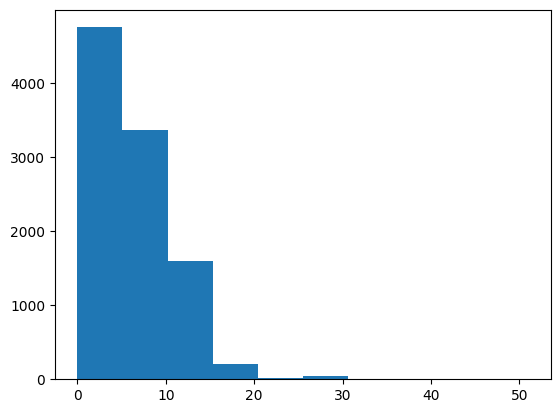

In [12]:
# Tweet lengths
plt.hist([len(t) for t in train_x + val_x]);

Now find the length of the longest tweet. Remember to look at the training and the validation set.

<a name="ex-2"></a>
### Exercise 2 - max_len
Calculate the length of the longest tweet.

In [13]:
# GRADED FUNCTION: max_length
def max_length(training_x, validation_x):
    """Computes the length of the longest tweet in the training and validation sets.

    Args:
        training_x (list): The tweets in the training set.
        validation_x (list): The tweets in the validation set.

    Returns:
        int: Length of the longest tweet.
    """
    ### START CODE HERE ###

    max_len = max([len(tweet) for tweet in training_x + validation_x])
    
    ### END CODE HERE ###
    return max_len

max_len = max_length(train_x, val_x)
print(f'The length of the longest tweet is {max_len} tokens.')

The length of the longest tweet is 51 tokens.


Expected output:

The length of the longest tweet is 51 tokens.

In [14]:
# Test your max_len function
w1_unittest.test_max_length(max_length)

 All tests passed


<a name="ex-3"></a>
### Exercise 3 - padded_sequence
Implement `padded_sequence` function to transform sequences of words into padded sequences of numbers. A couple of things to notice:

- The term `tensor` is used to refer to the encoded tweet but the function should return a regular python list, not a `tf.tensor`
- There is no need to truncate the tweet if it exceeds `max_len` as you already know the maximum length of the tweets beforehand

In [15]:
# GRADED FUNCTION: padded_sequence
def padded_sequence(tweet, vocab_dict, max_len, unk_token='[UNK]'):
    """transform sequences of words into padded sequences of numbers

    Args:
        tweet (list): A single tweet encoded as a list of strings.
        vocab_dict (dict): Vocabulary.
        max_len (int): Length of the longest tweet.
        unk_token (str, optional): Unknown token. Defaults to '[UNK]'.

    Returns:
        list: Padded tweet encoded as a list of int.
    """
    ### START CODE HERE ###
    
    # Find the ID of the UNK token, to use it when you encounter a new word
    unk_ID = vocab_dict[unk_token] 
    
    # First convert the words to integers by looking up the vocab_dict
    tensor = [vocab_dict.get(word, unk_ID) for word in tweet]

    # Then pad the tensor with zeroes up to the length max_len
    padded_tensor = tensor + ([0] * (max_len - len(tensor)))

    ### END CODE HERE ###

    return padded_tensor

Test the function

In [16]:
# Test your padded_sequence function
w1_unittest.test_padded_sequence(padded_sequence)

 All tests passed


Pad the train and validation dataset

In [17]:
train_x_padded = [padded_sequence(x, vocab, max_len) for x in train_x]
val_x_padded = [padded_sequence(x, vocab, max_len) for x in val_x]

<a name="3"></a>
## 3 - Define the structure of the neural network layers

In this part, you will write your own functions and layers for the neural network to test your understanding of the implementation. It will be similar to the one used in Keras and PyTorch. Writing your own small framework will help you understand how they all work and use them effectively in the future.

You will implement the ReLU and sigmoid functions, which you will use as activation functions for the neural network, as well as a fully connected (dense) layer.

<a name="3-1"></a>
### 3.1 - ReLU
You will now implement the ReLU activation in a function below. The ReLU function looks as follows: 
<img src = "images/relu.jpg" style="width:300px;height:150px;"/>

$$ \mathrm{ReLU}(x) = \mathrm{max}(0,x) $$


<a name="ex-4"></a>
### Exercise 4 - relu
**Instructions:** Implement the ReLU activation function below. Your function should take in a matrix or vector and it should transform all the negative numbers into 0 while keeping all the positive numbers intact. 

Notice you can get the maximum of two numbers by using [np.maximum](https://numpy.org/doc/stable/reference/generated/numpy.maximum.html).

In [18]:
# GRADED FUNCTION: relu
def relu(x):
    '''Relu activation function implementation
    Input: 
        - x (numpy array)
    Output:
        - activation (numpy array): input with negative values set to zero
    '''
    ### START CODE HERE ###

    activation = np.maximum(x, np.zeros_like(x))

    ### END CODE HERE ###

    return activation

In [19]:
# Check the output of your function
x = np.array([[-2.0, -1.0, 0.0], [0.0, 1.0, 2.0]], dtype=float)
print("Test data is:")
print(x)
print("\nOutput of relu is:")
print(relu(x))

Test data is:
[[-2. -1.  0.]
 [ 0.  1.  2.]]

Output of relu is:
[[0. 0. 0.]
 [0. 1. 2.]]


**Expected Output:**
```
Test data is:
[[-2. -1.  0.]
 [ 0.  1.  2.]]
 
Output of relu is:
[[0. 0. 0.]
 [0. 1. 2.]]
```

In [20]:
# Test your relu function
w1_unittest.test_relu(relu)

 All tests passed


<a name="3-2"></a>
### 3.2 - Sigmoid
You will now implement the sigmoid activation in a function below. The sigmoid function looks as follows: 
<img src = "images/sigmoid.jpg" style="width:300px;height:150px;"/>

$$ \mathrm{sigmoid}(x) = \frac{1}{1 + e^{-x}} $$


<a name="ex-5"></a>
### Exercise 5 - sigmoid
**Instructions:** Implement the sigmoid activation function below. Your function should take in a matrix or vector and it should transform all the numbers according to the formula above.

In [23]:
# GRADED FUNCTION: sigmoid
def sigmoid(x):
    '''Sigmoid activation function implementation
    Input: 
        - x (numpy array)
    Output:
        - activation (numpy array)
    '''
    ### START CODE HERE ###

    activation = 1 / (1 + np.exp(-x))

    ### END CODE HERE ###

    return activation    

In [25]:
# Check the output of your function
x = np.array([[-1000.0, -1.0, 0.0], [0.0, 1.0, 1000.0]], dtype=float)
print("Test data is:")
print(x)
print("\nOutput of sigmoid is:")
print(sigmoid(x))

Test data is:
[[-1000.    -1.     0.]
 [    0.     1.  1000.]]

Output of sigmoid is:
[[0.         0.26894142 0.5       ]
 [0.5        0.73105858 1.        ]]


**Expected Output:**
```
Test data is:
[[-1000.    -1.     0.]
 [    0.     1.  1000.]]

Output of sigmoid is:
[[0.         0.26894142 0.5       ]
 [0.5        0.73105858 1.        ]]
```

In [26]:
# Test your sigmoid function
w1_unittest.test_sigmoid(sigmoid)

 All tests passed


<a name="3.3"></a>
### 3.3 - Dense Class 

Implement the weight initialization in the `__init__` method.
- Weights are initialized with a random key.
- The shape of the weights (num_rows, num_cols) should equal the number of columns in the input data (this is in the last column) and the number of units respectively.
    - The number of rows in the weight matrix should equal the number of columns in the input data `x`.  Since `x` may have 2 dimensions if it represents a single training example (row, col), or three dimensions (batch_size, row, col), get the last dimension from the tuple that holds the dimensions of x.
    - The number of columns in the weight matrix is the number of units chosen for that dense layer.
- The values generated should have a mean of 0 and standard deviation of `stdev`.
    - To initialize random weights, a random generator is created using `random_generator = np.random.default_rng(seed=random_seed)`. This part is implemented for you. You will use `random_generator.normal(...)` to create your random weights. Check [here](https://numpy.org/doc/stable/reference/random/generator.html) how the random generator works.
    - Please don't change the `random_seed`, so that the results are reproducible for testing (and you can be fairly graded).

Implement the `forward` function of the Dense class. 
- The forward function multiplies the input to the layer (`x`) by the weight matrix (`W`)

$$\mathrm{forward}(\mathbf{x},\mathbf{W}) = \mathbf{xW} $$

- You can use `numpy.dot` to perform the matrix multiplication.

<a name="ex-6"></a>
### Exercise 6 - Dense

Implement the `Dense` class. You might want to check how normal random numbers can be generated with numpy by checking the [docs](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html#numpy.random.Generator.normal).

In [54]:
# GRADED CLASS: Dense
class Dense():
    """
    A dense (fully-connected) layer.
    """

    # Please implement '__init__'
    def __init__(self, n_units, input_shape, activation, stdev=0.1, random_seed=42):
        
        # Set the number of units in this layer
        self.n_units = n_units
        # Set the random key for initializing weights
        self.random_generator = np.random.default_rng(seed=random_seed)
        self.activation = activation
        
        ### START CODE HERE ###

        # Generate the weight matrix from a normal distribution and standard deviation of 'stdev'
        # Set the size of the matrix w
        w = self.random_generator.normal(scale=stdev, size = (input_shape[-1], n_units))
        
        ### END CODE HERE ##

        self.weights = w
        

    def __call__(self, x):
        return self.forward(x)
    
    
    # Please implement 'forward()'
    def forward(self, x):
        
        ### START CODE HERE ###

        # Matrix multiply x and the weight matrix
        dense = np.dot(x, self.weights)
        # Apply the activation function
        dense = sigmoid(dense)
        
        ### END CODE HERE ###
        return dense

In [55]:
# random_key = np.random.get_prng()  # sets random seed
z = np.array([[2.0, 7.0, 25.0]]) # input array

# Testing your Dense layer 
dense_layer = Dense(n_units=10, input_shape=z.shape, activation=relu)  #sets  number of units in dense layer

print("Weights are:\n",dense_layer.weights) #Returns randomly generated weights
print("Foward function output is:", dense_layer(z)) # Returns multiplied values of units and weights

Weights are:
 [[ 0.03047171 -0.10399841  0.07504512  0.09405647 -0.19510352 -0.13021795
   0.01278404 -0.03162426 -0.00168012 -0.08530439]
 [ 0.0879398   0.07777919  0.00660307  0.11272412  0.04675093 -0.08592925
   0.03687508 -0.09588826  0.08784503 -0.00499259]
 [-0.01848624 -0.06809295  0.12225413 -0.01545295 -0.04283278 -0.03521336
   0.05323092  0.03654441  0.04127326  0.0430821 ]]
Foward function output is: [[0.55338724 0.20328852 0.96276876 0.64356201 0.24346602 0.14902426
  0.83403059 0.54466656 0.83799521 0.7050568 ]]


**Expected Output:**
```
Weights are:
 [[ 0.03047171 -0.10399841  0.07504512  0.09405647 -0.19510352 -0.13021795
   0.01278404 -0.03162426 -0.00168012 -0.08530439]
 [ 0.0879398   0.07777919  0.00660307  0.11272412  0.04675093 -0.08592925
   0.03687508 -0.09588826  0.08784503 -0.00499259]
 [-0.01848624 -0.06809295  0.12225413 -0.01545295 -0.04283278 -0.03521336
   0.05323092  0.03654441  0.04127326  0.0430821 ]]

Foward function output is: [[0.21436609 0.         3.25266507 0.59085808 0.         0.
  1.61446659 0.17914382 1.64338651 0.87149558]]
```

Test the Dense class

In [51]:
# Test your Dense class
w1_unittest.test_Dense(Dense)

Dense layer produced incorrect output. Check your weights or your output computation.
	Expected: [[0.58625925 0.45039848]].
	Got: [[0.64250639 0.61073397]].
Dense layer produced incorrect output. Check your weights or your output computation.
	Expected: [[2.53729444 1.75257799]
 [0.40474861 0.30653932]].
	Got: [[0.92671529 0.85227767]
 [0.59982803 0.57604032]].
 6  Tests passed
 2  Tests failed


<a name="3-4"></a>
### 3.4 - Model

Now you will implement a classifier using neural networks. Here is the model architecture you will be implementing. 

<img src = "images/nn.jpg"/>

For the model implementation, you will use `TensorFlow` module, imported as `tf`. Your model will consist of layers and activation functions that you implemented above, but you will take them directly from the tensorflow library.

You will use the [tf.keras.Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) module, which allows you to stack the layers in a sequence as you want them in the model. You will use the following layers:
- [tf.keras.layers.Embedding](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding)
    - Turns positive integers (word indices) into vectors of fixed size. You can imagine it as creating one-hot vectors out of indices and then running them through a fully-connected (dense) layer.
- [tf.keras.layers.GlobalAveragePooling1D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GlobalAveragePooling1D)
- [tf.keras.layers.Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)
    - Regular fully connected layer
    
Please use the `help` function to view documentation for each layer.

In [ ]:
# View documentation on how to implement the layers in tf.
# help(tf.keras.Sequential)
# help(tf.keras.layers.Embedding)
# help(tf.keras.layers.GlobalAveragePooling1D)
# help(tf.keras.layers.Dense)

<a name="ex-7"></a>
### Exercise 7 - create_model
Implement the create_model function. 

First you need to create the model. The `tf.keras.Sequential` has been implemented for you. Within it you should put the following layers:
- `tf.keras.layers.Embedding` with the size `num_words` times `embeding_dim` and the `input_length` set to the length of the input sequences (which is the length of the longest tweet).
- `tf.keras.layers.GlobalAveragePooling1D` with no extra parameters.
- `tf.keras.layers.Dense` with the size of one (this is your classification output) and `'sigmoid'` activation passed to the  `activation` keyword parameter.
Make sure to separate the layers with a comma.

Then you need to compile the model. Here you can look at all the parameters you can set when compiling the model:  [tf.keras.Model](https://www.tensorflow.org/api_docs/python/tf/keras/Model). In this notebook, you just need to set the loss to `'binary_crossentropy'` (because you are doing binary classification with a sigmoid function at the output), the optimizer to `'adam'` and the metrics to `'accuracy'` (so that you can track the accuracy on the training and validation sets.

In [58]:
# GRADED FUNCTION: create_model
def create_model(num_words, embedding_dim, max_len):
    """
    Creates a text classifier model
    
    Args:
        num_words (int): size of the vocabulary for the Embedding layer input
        embedding_dim (int): dimensionality of the Embedding layer output
        max_len (int): length of the input sequences
    
    Returns:
        model (tf.keras Model): the text classifier model
    """
    
    tf.random.set_seed(123)
    
    ### START CODE HERE
    
    model = tf.keras.Sequential([ 
        tf.keras.layers.Embedding(num_words, embedding_dim, input_length=max_len),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]) 
    
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    ### END CODE HERE

    return model

In [59]:
# Create the model
model = create_model(num_words=num_words, embedding_dim=16, max_len=max_len)

print('The model is created!\n')

The model is created!



In [60]:
# Test your create_model function
w1_unittest.test_model(create_model)

 All tests passed


Now you need to prepare the data to put into the model. You already created lists of x and y values and all you need to do now is convert them to `NumPy` arrays, as this is the format that the model is expecting.

Then you can create a model with the function you defined above and train it. The trained model should give you about 99.6 % accuracy on the validation set.

In [61]:
# Prepare the data
train_x_prepared = np.array(train_x_padded)
val_x_prepared = np.array(val_x_padded)

train_y_prepared = np.array(train_y)
val_y_prepared = np.array(val_y)

print('The data is prepared for training!\n')

# Fit the model
print('Training:')
history = model.fit(train_x_prepared, train_y_prepared, epochs=20, validation_data=(val_x_prepared, val_y_prepared))

The data is prepared for training!

Training:
Epoch 1/20
250/250 [==============================] - 16s 53ms/step - loss: 0.6843 - accuracy: 0.6472 - val_loss: 0.6696 - val_accuracy: 0.9795
Epoch 2/20
250/250 [==============================] - 3s 13ms/step - loss: 0.6360 - accuracy: 0.9425 - val_loss: 0.6012 - val_accuracy: 0.9760
Epoch 3/20
250/250 [==============================] - 1s 4ms/step - loss: 0.5441 - accuracy: 0.9871 - val_loss: 0.5023 - val_accuracy: 0.9900
Epoch 4/20
250/250 [==============================] - 1s 3ms/step - loss: 0.4362 - accuracy: 0.9899 - val_loss: 0.4002 - val_accuracy: 0.9935
Epoch 5/20
250/250 [==============================] - 1s 4ms/step - loss: 0.3377 - accuracy: 0.9944 - val_loss: 0.3127 - val_accuracy: 0.9920
Epoch 6/20
250/250 [==============================] - 1s 3ms/step - loss: 0.2583 - accuracy: 0.9944 - val_loss: 0.2446 - val_accuracy: 0.9955
Epoch 7/20
250/250 [==============================] - 1s 4ms/step - loss: 0.1982 - accuracy: 0.9955

<a name="4"></a>
## 4 - Evaluate the model

Now that you trained the model, it is time to look at its performance. While training, you already saw a printout of the accuracy and loss on training and validation sets. To have a better feeling on how the model improved with training, you can plot them below.

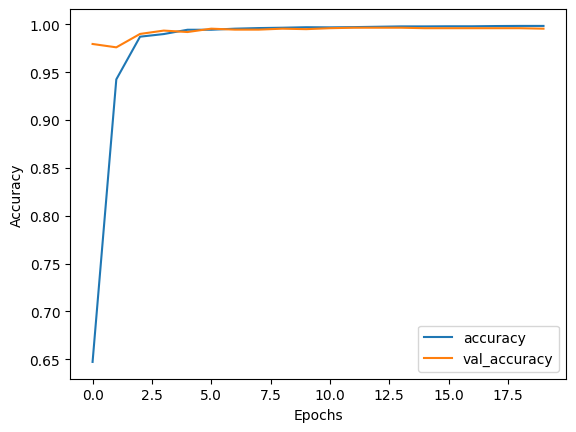

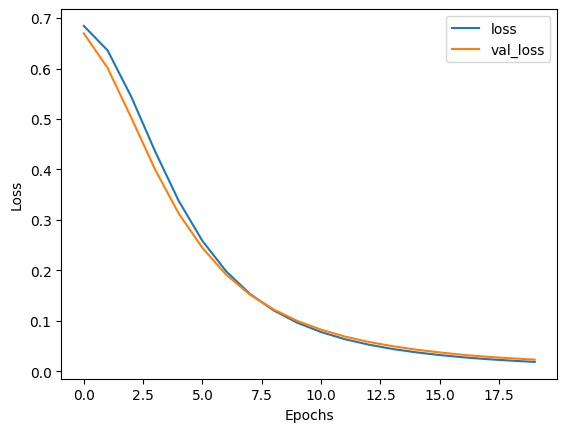

In [62]:
def plot_metrics(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric.title())
    plt.legend([metric, f'val_{metric}'])
    plt.show()
    
plot_metrics(history, "accuracy")
plot_metrics(history, "loss")

You can see that already after just a few epochs the model reached very high accuracy on both sets. But if you zoom in, you can see that the performance was still slightly improving on the training set through all 20 epochs, while it stagnated a bit earlier on the validation set. The loss on the other hand kept decreasing through all 20 epochs, which means that the model also got more confident in its predictions.

<a name="4-1"></a>
### 4.1 - Predict on Data

Now you can use the model for predictions on unseen tweets as `model.predict()`. This is as simple as passing an array of sequences you want to predict to the mentioned method.
In the cell below you prepare an extract of positive and negative samples from the validation set (remember, the positive examples are at the beginning and the negative are at the end) for the demonstration and predict their values with the model. Note that in the ideal case you should have another test set from which you would draw this data to inspect the model performance. But for the demonstration here the validation set will do just as well.

In [63]:
# Prepare an example with 10 positive and 10 negative tweets.
example_for_prediction = np.append(val_x_prepared[0:10], val_x_prepared[-10:], axis=0)

# Make a prediction on the tweets.
model.predict(example_for_prediction)

1/1 [==============================] - 0s 68ms/step


array([[0.9005996 ],
       [0.99423134],
       [0.9970427 ],
       [0.95283836],
       [0.99767584],
       [0.99607456],
       [0.99204504],
       [0.9796626 ],
       [0.9984646 ],
       [0.99830997],
       [0.01063726],
       [0.04248067],
       [0.01301951],
       [0.01670127],
       [0.01765156],
       [0.00630074],
       [0.01576765],
       [0.0082139 ],
       [0.02367917],
       [0.03264339]], dtype=float32)

You can see that the first 10 numbers are very close to 1, which means the model correctly predicted positive sentiment and the last 10 numbers are all close to zero, which means the model correctly predicted negative sentiment.

<a name="5"></a>
## 5 - Test With Your Own Input

Finally you will test with your own input. You will see that deepnets are more powerful than the older methods you have used before. Although you go close to 100 % accuracy on the first two assignments, you can see even more improvement here. 

<a name="5-1"></a>
### 5.1 - Create the Prediction Function

In [64]:
def get_prediction_from_tweet(tweet, model, vocab, max_len):
    tweet = process_tweet(tweet)
    tweet = padded_sequence(tweet, vocab, max_len)
    tweet = np.array([tweet])

    prediction = model.predict(tweet, verbose=False)
    
    return prediction[0][0]

Now you can write your own tweet and see how the model predicts it. Try playing around with the words - for example change `gr8` for `great` in the sample tweet and see if the score gets higher or lower. 

Also Try writing your own tweet and see if you can find what affects the output most.

In [65]:
unseen_tweet = '@DLAI @NLP_team_dlai OMG!!! what a daaay, wow, wow. This AsSiGnMeNt was gr8.'

prediction_unseen = get_prediction_from_tweet(unseen_tweet, model, vocab, max_len)
print(f"Model prediction on unseen tweet: {prediction_unseen}")

Model prediction on unseen tweet: 0.745680034160614


<a name="ex-8"></a>
### Exercise 8 - graded_very_positive_tweet
**Instructions:** For your last exercise in this assignment, you need to write a very positive tweet. To pass this exercise, the tweet needs to score at least 0.99 with the model (which means the model thinks it is very positive).

Hint: try some positive words and/or happy smiley faces :)

In [68]:
# GRADED VARIABLE: graded_very_positive_tweet

### START CODE HERE ###

# Please replace this sad tweet with a happier tweet
graded_very_positive_tweet = 'i am so haaapyy :) :)'

### END CODE HERE ###

Test your positive tweet below

In [69]:
# Test your graded_very_positive_tweet tweet
prediction = get_prediction_from_tweet(graded_very_positive_tweet, model, vocab, max_len)
if prediction > 0.99:
    print("\033[92m All tests passed")
else:
    print("The model thinks your tweet is not positive enough.\nTry figuring out what makes some of the tweets in the validation set so positive.")

 All tests passed


<a name="6"></a>
## 6 - Word Embeddings

In this last section, you will visualize the word embeddings that your model has learned for this sentiment analysis task.
By using `model.layers`, you get a list of the layers in the model. The embeddings are saved in the first layer of the model (position 0).
You can retrieve the weights of the layer by calling `layer.get_weights()` function, which gives you a list of matrices with weights. The embedding layer has only one matrix in it, which contains your embeddings. Let's extract the embeddings.

In [70]:
# Get the embedding layer
embeddings_layer = model.layers[0]

# Get the weights of the embedding layer
embeddings = embeddings_layer.get_weights()[0]

print(f"Weights of embedding layer have shape: {embeddings.shape}")

Weights of embedding layer have shape: (9535, 16)


Since your embeddings are 16-dimensional (or different if you chose some other dimension), it is hard to visualize them without some kind of transformation. Here, you'll use scikit-learn to perform dimensionality reduction of the word embeddings using PCA, with which you can reduce the number of dimensions to two, while keeping as much information as possible. Then you can visualize the data to see how the vectors for different words look like.

In [71]:
# PCA with two dimensions
pca = PCA(n_components=2)

# Dimensionality reduction of the word embeddings
embeddings_2D = pca.fit_transform(embeddings)

Now, everything is ready to plot a selection of words in 2d. Dont mind the axes on the plot - they point in the directions calculated by the PCA algorithm. Pay attention to which words group together.

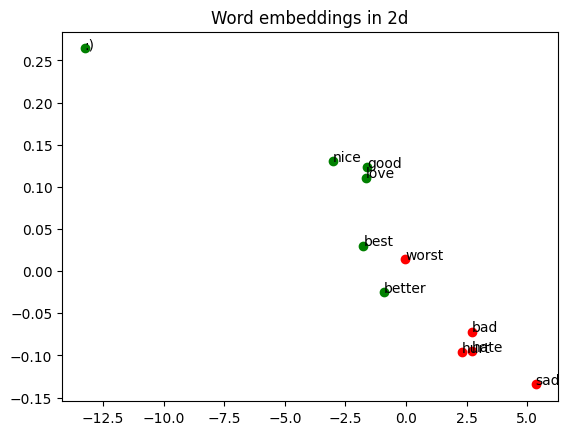

In [72]:
#Selection of negative and positive words
neg_words = ['bad', 'hurt', 'sad', 'hate', 'worst']
pos_words = ['best', 'good', 'nice', 'love', 'better', ':)']

#Index of each selected word
neg_n = [vocab[w] for w in neg_words]
pos_n = [vocab[w] for w in pos_words]

plt.figure()

#Scatter plot for negative words
plt.scatter(embeddings_2D[neg_n][:,0], embeddings_2D[neg_n][:,1], color = 'r')
for i, txt in enumerate(neg_words): 
    plt.annotate(txt, (embeddings_2D[neg_n][i,0], embeddings_2D[neg_n][i,1]))

#Scatter plot for positive words
plt.scatter(embeddings_2D[pos_n][:,0], embeddings_2D[pos_n][:,1], color = 'g')
for i, txt in enumerate(pos_words): 
    plt.annotate(txt,(embeddings_2D[pos_n][i,0], embeddings_2D[pos_n][i,1]))

plt.title('Word embeddings in 2d')

plt.show()

As you can see, the word embeddings for this task seem to distinguish negative and positive meanings. However, similar words don't necessarily cluster together, since you only trained the model to analyze the overall sentiment. Notice how the smiley face is much further away from the negative words than any of the positive words are. It turns out that smiley faces are actually the most important predictors of sentiment in this dataset. Try removing them from the tweets (and consequently from the vocabulary) and see how well the model performs then. You should see quite a significant drop in performance.

**Congratulations on finishing this assignment!**

During this assignment you tested your theoretical and practical skills by creating a vocabulary of words in the tweets and coding a neural network that created word embeddings and classified the tweets into positive or negative. Next week you will start coding some sequence models!

**Keep up the good work!**
